In [1]:
from drive.MyDrive.datas.module.preprocess import *
from drive.MyDrive.datas.module.setting_tf import *
from drive.MyDrive.datas.module.visualization import *

In [2]:
dataset = get_dataset()

In [3]:
datas = split_train_valid_df(dataset=dataset, img_size=224, shuffle=True)

In [4]:
X_train, y_train, X_valid, y_valid = split_X_y_dataset(datas=datas)

In [5]:
# MinMaxScaling
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [6]:
name = "efficientnet"
base_model = load_base_model(name, input_shape=(224, 224, 3), trainable=False)

model = make_network(base_model, name)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              3413024   
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3

In [ ]:
monitor_ls = ["val_accuracy", "val_loss"]
callbacks = setting_callback("efficientnet", monitors=monitor_ls)

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_data=(X_valid, y_valid), verbose=1,
                    callbacks=callbacks)

Epoch 1/150
221/221 [==============================] - 29s 53ms/step - loss: 0.3262 - accuracy: 0.8631 - val_loss: 0.2579 - val_accuracy: 0.8987

Epoch 00001: val_accuracy improved from -inf to 0.89867, saving model to /content/drive/MyDrive/datas/model_result/Efficient_acc.h5

Epoch 00001: val_loss improved from inf to 0.25788, saving model to /content/drive/MyDrive/datas/model_result/Efficient_loss.h5
Epoch 2/150
221/221 [==============================] - 9s 43ms/step - loss: 0.2314 - accuracy: 0.9097 - val_loss: 0.2398 - val_accuracy: 0.9050

Epoch 00002: val_accuracy improved from 0.89867 to 0.90498, saving model to /content/drive/MyDrive/datas/model_result/Efficient_acc.h5

Epoch 00002: val_loss improved from 0.25788 to 0.23980, saving model to /content/drive/MyDrive/datas/model_result/Efficient_loss.h5
Epoch 3/150
221/221 [==============================] - 9s 43ms/step - loss: 0.1927 - accuracy: 0.9253 - val_loss: 0.2453 - val_accuracy: 0.9010

Epoch 00003: val_accuracy did not i

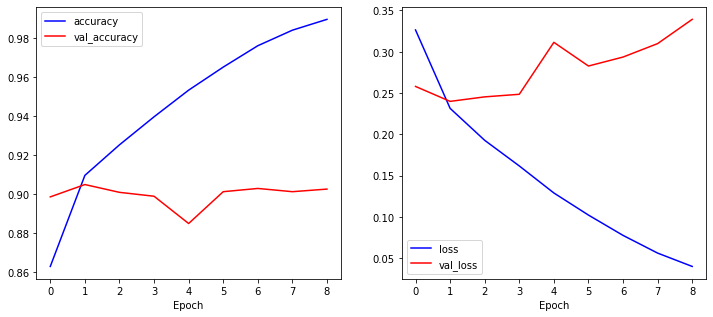

In [ ]:
make_scores_graph(history=history)

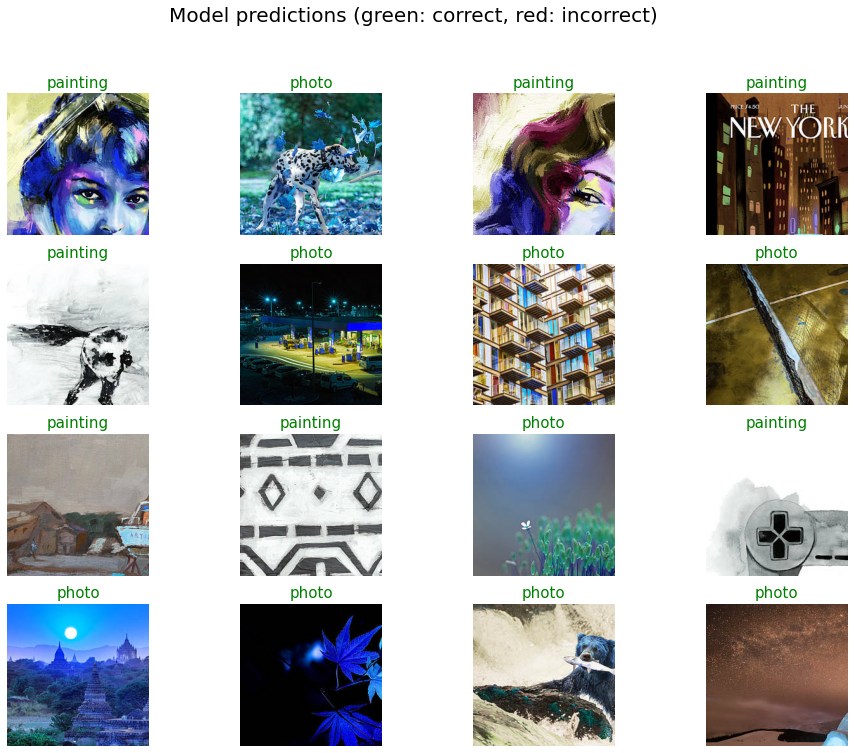

In [7]:
weight = "/content/drive/MyDrive/datas/model_result/efficientnet_loss.h5"
show_predict(model, weight, X_valid, y_valid)